In [1]:
# Load modules for data manipulation
from dotenv import load_dotenv
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import call
import pandas as pd
import numpy as np
import os

In [2]:
# Load modules for machine learning
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Calculate the accurancy of the model
from sklearn.metrics import accuracy_score, classification_report

# For drawing the graph
from sklearn.tree import export_graphviz

In [9]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature name logistic regressions
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + '-FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
    plt.savefig('{}.svg'.format(model_type))

In [23]:
def log_reg(data, ecos, cols):
    ''' The Model'''
    
    # Labels are the values we want to predict
    labels = np.array(data['ECO'])

    # Remove the labels from the features
    features = np.array(data[cols])

    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state=42)

    # Instantiate model with 1000 decision trees
    logisticRegr = LogisticRegression()
    
    # Train the model on training data
    logisticRegr.fit(train_features, train_labels)
    
    # Use the forest's predict method on the test data
    predictions = logisticRegr.predict(test_features)

    # Classification report
    print(classification_report(test_labels, predictions.round()))

In [25]:
def knn(data, ecos, cols):
    ''' The Model'''

    # Labels are the values we want to predict
    labels = np.array(data['ECO'])

    # Remove the labels from the features
    features = np.array(data[cols])

    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state=42)

    # Instantiate model with 1000 decision trees
    model = KNeighborsClassifier(n_neighbors=5)
    
    # Train the model on training data
    model.fit(train_features, train_labels)
    
    # Use the forest's predict method on the test data
    predictions = model.predict(test_features)

    # Classification report
    print(classification_report(test_labels, predictions.round()))

In [6]:
# Get the data from the other notebook
%store -r data
%store -r cols
%store -r eco

# -------------------------------------------------------------------------------------------------------------

In [7]:
''' The Model'''

# Labels are the values we want to predict
labels = np.array(data['ECO'])

# Remove the labels from the features
features = np.array(data[cols])

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

In [8]:
# Instantiate model with 300 decision trees
rf = RandomForestRegressor(n_estimators = 300)

# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Classification report
print(classification_report(test_labels, predictions.round())) 

              precision    recall  f1-score   support

       False       0.88      0.91      0.90     70580
        True       0.79      0.73      0.76     32660

    accuracy                           0.86    103240
   macro avg       0.84      0.82      0.83    103240
weighted avg       0.85      0.86      0.85    103240



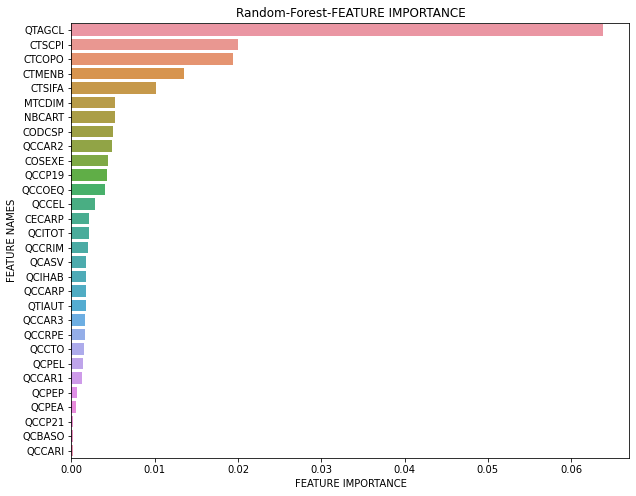

In [10]:
plot_feature_importance(rf.feature_importances_[:30],cols[:30],'Random-Forest')